# MGE30301 Data Mining Homework 5

## 20121229 JunPyo Park

In [83]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

# Problem 1

<img src = "https://trello-attachments.s3.amazonaws.com/5b29ec749cfb0d90ada47d03/5beed7aec5343770f1b1c281/6ad4961683ce7131854776d9e1b50895/image.png">

In [82]:
import os
import gc
import seaborn as sns
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import make_scorer, fbeta_score, classification_report, roc_auc_score, confusion_matrix, roc_curve, auc
import warnings
warnings.filterwarnings("ignore")

In [3]:
from sklearn.metrics.pairwise import *

In [10]:
df = pd.DataFrame(columns=['X1','X2','Y'], index=np.arange(10)+1)
df['X1'] = [5,4,7,8,3,2,6,9,5,7]
df['X2'] = [7,3,8,6,6,5,6,6,4,6]
df['Y'] = [1,-1,1,-1,-1,-1,1,1,-1,1]
df.T

,1,2,3,4,5,6,7,8,9,10
X1,5,4,7,8,3,2,6,9,5,7
X2,7,3,8,6,6,5,6,6,4,6
Y,1,-1,1,-1,-1,-1,1,1,-1,1


In [17]:
X = df.iloc[:,0:2]
Y = df['Y']

In [18]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [19]:
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.11111111  0.46249679]
 [ 0.46249679  1.11111111]]


In [20]:
from sklearn.svm import SVC

svc = SVC(kernel='linear', C=1)
svc.fit(df, Y)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [21]:
#클래스 별 서포터 개수
svc.n_support_

array([3, 2])

In [22]:
#각 서포트의 인덱스
svc.support_

array([3, 4, 8, 6, 9])

In [23]:
#서포트 백터들의 x값
svc.support_vectors_

array([[ 8.,  6., -1.],
       [ 3.,  6., -1.],
       [ 5.,  4., -1.],
       [ 6.,  6.,  1.],
       [ 7.,  6.,  1.]])

In [24]:
svc.support_

array([3, 4, 8, 6, 9])

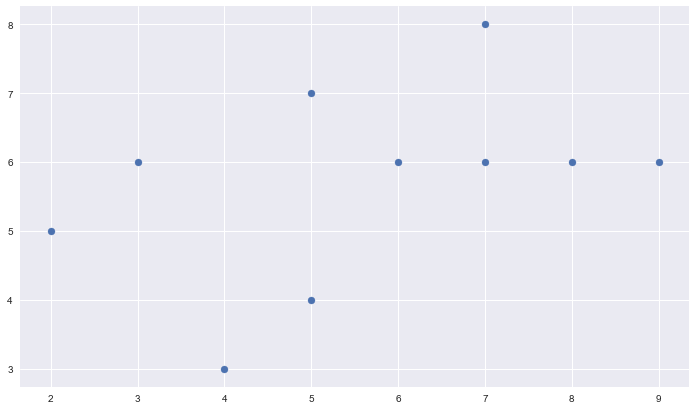

In [25]:
plt.figure(figsize=(12,7))
plt.scatter(X1,X2, marker='o')
plt.show()

In [97]:
X = np.array(df[['X1','X2']])
X

array([[5, 7],
       [4, 3],
       [7, 8],
       [8, 6],
       [3, 6],
       [2, 5],
       [6, 6],
       [9, 6],
       [5, 4],
       [7, 6]], dtype=int64)

In [103]:
y = np.array(Y)
y

array([ 1, -1,  1, -1, -1, -1,  1,  1, -1,  1], dtype=int64)

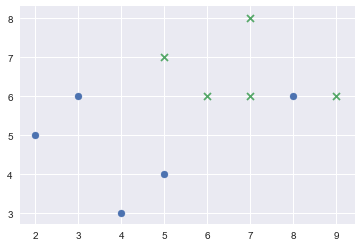

In [131]:
plt.scatter(X[y == -1, 0], X[y == -1, 1], marker='o')
plt.scatter(X[y == +1, 0], X[y == +1, 1], marker='x')
plt.show()

In [122]:
xmin = X[:,0].min()
xmax = X[:,0].max()
ymin = X[:,1].min()
ymax = X[:,1].max()
xx = np.linspace(xmin, xmax, 10)
yy = np.linspace(ymin, ymax, 10)
X1, X2 = np.meshgrid(xx, yy)

In [135]:
X1

array([[ 2.        ,  2.77777778,  3.55555556,  4.33333333,  5.11111111,
         5.88888889,  6.66666667,  7.44444444,  8.22222222,  9.        ],
       [ 2.        ,  2.77777778,  3.55555556,  4.33333333,  5.11111111,
         5.88888889,  6.66666667,  7.44444444,  8.22222222,  9.        ],
       [ 2.        ,  2.77777778,  3.55555556,  4.33333333,  5.11111111,
         5.88888889,  6.66666667,  7.44444444,  8.22222222,  9.        ],
       [ 2.        ,  2.77777778,  3.55555556,  4.33333333,  5.11111111,
         5.88888889,  6.66666667,  7.44444444,  8.22222222,  9.        ],
       [ 2.        ,  2.77777778,  3.55555556,  4.33333333,  5.11111111,
         5.88888889,  6.66666667,  7.44444444,  8.22222222,  9.        ],
       [ 2.        ,  2.77777778,  3.55555556,  4.33333333,  5.11111111,
         5.88888889,  6.66666667,  7.44444444,  8.22222222,  9.        ],
       [ 2.        ,  2.77777778,  3.55555556,  4.33333333,  5.11111111,
         5.88888889,  6.66666667,  7.44444444

In [ ]:
Z = np.empty(X1.shape)
for (i, j), val in np.ndenumerate(X1):
    x1 = val
    x2 = X2[i, j]
    print(x1,x2)
    p = svc.decision_function([[x1, x2]])
    Z[i, j] = p[0]
levels = [-1, 0, 1]
linestyles = ['dashed', 'solid', 'dashed']
plt.scatter(X[y == -1, 0], X[y == -1, 1], marker='o')
plt.scatter(X[y == +1, 0], X[y == +1, 1], marker='x')
plt.contour(X1, X2, Z, levels, colors='k', linestyles=linestyles)
plt.scatter(svc.support_vectors_[:, 0], 
            svc.support_vectors_[:, 1], 
            s=300, alpha=0.3)

plt.show()

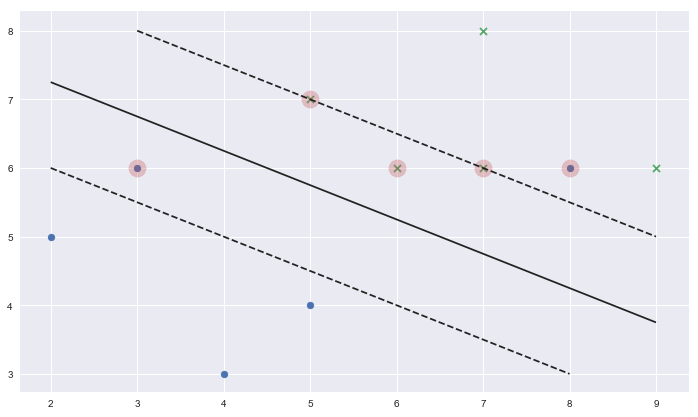

In [125]:
svc.support_vectors_[:, 0]

array([ 8.,  3.,  5.,  6.,  7.])

In [257]:
svc.support_vectors_[:, 1]

array([6., 6., 7., 6., 6.])

<img src = "https://trello-attachments.s3.amazonaws.com/5b29ec749cfb0d90ada47d03/5beed7aec5343770f1b1c281/d4dcc9e37ab60b014cde8f9838660045/image.png">

In [85]:
def plot_svm(X, y, model, title, xmin=1.5, xmax=10, ymin=2.5, ymax=9):
    XX, YY = np.meshgrid(np.arange(xmin, xmax, (xmax-xmin)/1000), np.arange(ymin, ymax, (ymax-ymin)/1000))
    ZZ = np.reshape(model.predict(np.array([XX.ravel(), YY.ravel()]).T), XX.shape)
    plt.contourf(XX, YY, ZZ, cmap=plt.cm.Set1, alpha=0.5)
    plt.scatter(X[y == -1, 0], X[y == -1, 1], marker='o')
    plt.scatter(X[y == +1, 0], X[y == +1, 1], marker='x')
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    plt.title(title)
    plt.show()
    
svc = SVC(kernel='linear', C=1)
svc.fit(df, Y)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### Approximates feature map of an RBF kernel by Monte Carlo approximation of its Fourier transform.

In [ ]:
plt.figure(figsize=(12,7))
Linsvc = SVC(kernel='linear', C=1)
Linsvc.fit(df, Y)
plot_svm(X, y, Linsvc, "Linear SVC")

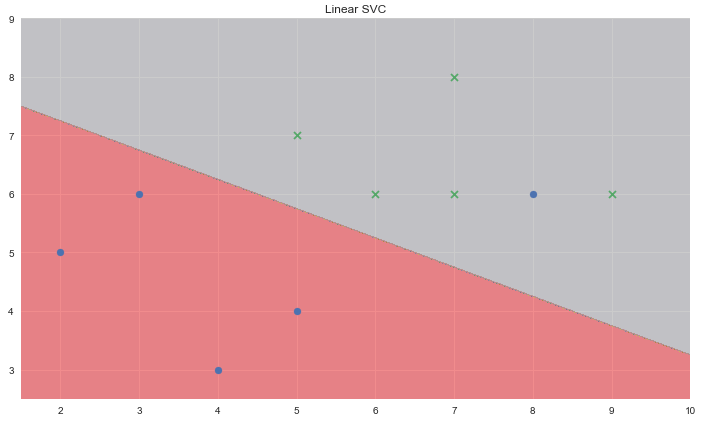

In [ ]:
RBFsvc = SVC(kernel='rbf', random_state=0, gamma=1, C=1.0)
RBFsvc.fit(df, Y)
plot_svm(X, y, RBFsvc, "RBF SVC")

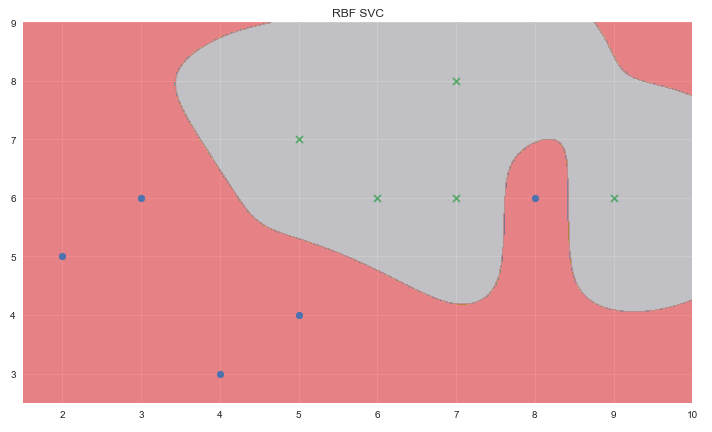

In [ ]:
Polysvc = SVC(kernel='poly',degree=2, random_state=0, gamma=1, C=1.0) # degree 2
Polysvc.fit(df, Y)
plot_svm(X, y, Polysvc, "Poly SVC")

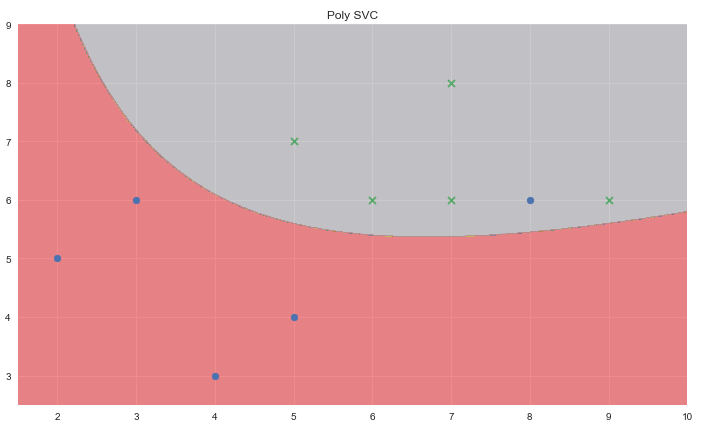

In [265]:
Polysvc

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='poly',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

<img src = "https://trello-attachments.s3.amazonaws.com/5b29ec749cfb0d90ada47d03/5beed7aec5343770f1b1c281/1eb3d3045f64a10af57ebb2869dc96a1/image.png">

In [276]:
from sklearn import metrics

In [140]:
Y = df2['Y']

In [159]:
for i in range(len(df2)):
    y_hat = np.zeros(len(df2)-i)

In [142]:
for i in range(len(df2)+1):
    y_hat = np.zeros(len(df2)-i)
    y_hat = np.append(y_hat,np.ones(i))
    print(y_hat)

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  1.  1.]
[ 0.  0.  0.  0.  0.  0.  0.  1.  1.  1.]
[ 0.  0.  0.  0.  0.  0.  1.  1.  1.  1.]
[ 0.  0.  0.  0.  0.  1.  1.  1.  1.  1.]
[ 0.  0.  0.  0.  1.  1.  1.  1.  1.  1.]
[ 0.  0.  0.  1.  1.  1.  1.  1.  1.  1.]
[ 0.  0.  1.  1.  1.  1.  1.  1.  1.  1.]
[ 0.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


In [144]:
for i in range(len(df2)+1):
    y_hat = np.zeros(len(df2)-i)
    y_hat = np.append(y_hat,np.ones(i))
    print(roc_auc_score(Y,y_hat))

0.5
0.583333333333
0.666666666667
0.75
0.625
0.708333333333
0.791666666667
0.666666666667
0.75
0.625
0.5


In [145]:
from sklearn.metrics import recall_score, precision_score

In [146]:
for i in range(len(df2)+1):
    y_hat = np.zeros(len(df2)-i)
    y_hat = np.append(y_hat,np.ones(i))
    print(recall_score(Y,y_hat))

0.0
0.166666666667
0.333333333333
0.5
0.5
0.666666666667
0.833333333333
0.833333333333
1.0
1.0
1.0


In [147]:
for i in range(len(df2)+1):
    y_hat = np.zeros(len(df2)-i)
    y_hat = np.append(y_hat,np.ones(i))
    print(precision_score(Y,y_hat))

0.0
1.0
1.0
1.0
0.75
0.8
0.833333333333
0.714285714286
0.75
0.666666666667
0.6


In [158]:
result.dropna()

,C,TP,FN,FP,TN,Sensitivity,Specificity,1-Specificity
0,24.0,6.0,0.0,4.0,0.0,1.0000,0.00,1.00
1,35.0,6.0,0.0,3.0,1.0,1.0000,0.25,0.75
2,37.0,6.0,0.0,2.0,2.0,1.0000,0.50,0.50
3,42.0,5.0,1.0,2.0,2.0,0.8330,0.50,0.50
4,49.0,5.0,1.0,1.0,3.0,0.8330,0.75,0.25
5,54.0,4.0,2.0,1.0,3.0,0.6670,0.75,0.25
6,56.0,3.0,3.0,1.0,3.0,0.5000,0.75,0.25
7,68.0,3.0,3.0,0.0,4.0,0.5000,1.00,0.00
8,72.0,2.0,4.0,0.0,4.0,0.3330,1.00,0.00
9,73.0,1.0,5.0,0.0,4.0,0.1667,1.00,0.00


In [164]:
plt.figure(figsize=(12,8))


for i in range(len(df2)+1):
    y_hat = np.zeros(len(df2)-i)
    y_hat = np.append(y_hat,np.ones(i))
    fpr1, tpr1, thresholds1 = roc_curve(Y,y_hat)
    k = roc_auc_score(Y,y_hat)

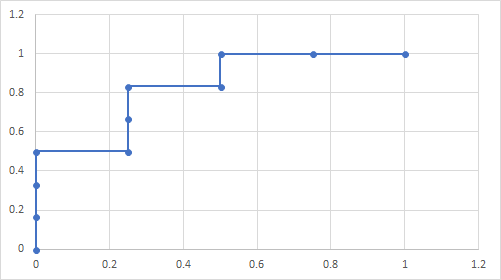

<img src = "https://trello-attachments.s3.amazonaws.com/5b29ec749cfb0d90ada47d03/5beed7aec5343770f1b1c281/5dfa805a098975dbb20946aa21c3ca21/image.png">

<img src = "https://trello-attachments.s3.amazonaws.com/5b29ec749cfb0d90ada47d03/5beed7aec5343770f1b1c281/7510e29d3bfd50b1255563455a43e9d3/image.png">

Result from excel

<img src = "https://trello-attachments.s3.amazonaws.com/5b29ec749cfb0d90ada47d03/5beed7aec5343770f1b1c281/cbb085b47db25d84a6669f3d11fa2fbb/image.png">

<img src = "https://trello-attachments.s3.amazonaws.com/5b29ec749cfb0d90ada47d03/5beed7aec5343770f1b1c281/f54941787d6bf87fcee060a001568758/image.png">

<img src = "https://trello-attachments.s3.amazonaws.com/5b29ec749cfb0d90ada47d03/5beed7aec5343770f1b1c281/c1de402593436bb04f738aba912baa9b/image.png">

In [149]:
#Make array
O1= np.array([351,15.5,6.2,0.8,76.6])
O2= np.array([471,4,19.5,24,46.2])
O3= np.array([349,40,4.5,0.4,54.5])
O4= np.array([366,11.5,11.5,1.4,74.5])
O5= np.array([270,35,8,1.5,54.3])
O6= np.array([414,4.5,7.2,8.2,79.1])
O7= np.array([325,22.7,6.7,3.7,66.2])
O8= np.array([116,72,2.6,0.3,24.8])
O9= np.array([377,6,9,1,80.2])
O10= np.array([167,60.2,24.2,4.2,6.6])

In [150]:
#Make List
data = [
        [351,15.5,6.2,0.8,76.6],
        [471,4,19.5,24,46.2],
        [349,40,4.5,0.4,54.5],
        [366,11.5,11.5,1.4,74.5],
        [270,35,8,1.5,54.3],
        [414,4.5,7.2,8.2,79.1],
        [325,22.7,6.7,3.7,66.2],
        [116,72,2.6,0.3,24.8],
        [377,6,9,1,80.2],
        [167,60.2,24.2,4.2,6.6]
]
data

[[351, 15.5, 6.2, 0.8, 76.6],
 [471, 4, 19.5, 24, 46.2],
 [349, 40, 4.5, 0.4, 54.5],
 [366, 11.5, 11.5, 1.4, 74.5],
 [270, 35, 8, 1.5, 54.3],
 [414, 4.5, 7.2, 8.2, 79.1],
 [325, 22.7, 6.7, 3.7, 66.2],
 [116, 72, 2.6, 0.3, 24.8],
 [377, 6, 9, 1, 80.2],
 [167, 60.2, 24.2, 4.2, 6.6]]

In [151]:
#Make Matrix
M_data = np.matrix(data)
M_data

matrix([[  3.51000000e+02,   1.55000000e+01,   6.20000000e+00,
           8.00000000e-01,   7.66000000e+01],
        [  4.71000000e+02,   4.00000000e+00,   1.95000000e+01,
           2.40000000e+01,   4.62000000e+01],
        [  3.49000000e+02,   4.00000000e+01,   4.50000000e+00,
           4.00000000e-01,   5.45000000e+01],
        [  3.66000000e+02,   1.15000000e+01,   1.15000000e+01,
           1.40000000e+00,   7.45000000e+01],
        [  2.70000000e+02,   3.50000000e+01,   8.00000000e+00,
           1.50000000e+00,   5.43000000e+01],
        [  4.14000000e+02,   4.50000000e+00,   7.20000000e+00,
           8.20000000e+00,   7.91000000e+01],
        [  3.25000000e+02,   2.27000000e+01,   6.70000000e+00,
           3.70000000e+00,   6.62000000e+01],
        [  1.16000000e+02,   7.20000000e+01,   2.60000000e+00,
           3.00000000e-01,   2.48000000e+01],
        [  3.77000000e+02,   6.00000000e+00,   9.00000000e+00,
           1.00000000e+00,   8.02000000e+01],
        [  1.670000

In [152]:
#Make data frame
df3 = pd.DataFrame(M_data)
df3

,0,1,2,3,4
0,351.0,15.5,6.2,0.8,76.6
1,471.0,4.0,19.5,24.0,46.2
2,349.0,40.0,4.5,0.4,54.5
3,366.0,11.5,11.5,1.4,74.5
4,270.0,35.0,8.0,1.5,54.3
5,414.0,4.5,7.2,8.2,79.1
6,325.0,22.7,6.7,3.7,66.2
7,116.0,72.0,2.6,0.3,24.8
8,377.0,6.0,9.0,1.0,80.2
9,167.0,60.2,24.2,4.2,6.6


<img src = "https://trello-attachments.s3.amazonaws.com/5b29ec749cfb0d90ada47d03/5beed7aec5343770f1b1c281/63f2f911b4c8d05e0db543a4974f1909/image.png">

In [307]:
from scipy.spatial.distance import pdist
from sklearn.metrics.pairwise import euclidean_distances

In [311]:
O49 = euclidean_distances(M_data,M_data)
O49
print(O49)

[[  0.         127.16737003  33.10151054  16.54871596  86.2685922
   64.43609237  29.06303494 247.21185247  28.05512431 202.70582133]
 [127.16737003   0.         130.50229883 111.61048338 205.10024378
   68.7938224  150.47132617 363.25508943 103.12734846 312.34072741]
 [ 33.10151054 130.50229883   0.          39.38591119  79.24329625
   78.47636587  32.06103554 237.06267104  51.19667958 190.33911842]
 [ 16.54871596 111.61048338  39.38591119   0.         100.93834752
   49.38511922  43.63095232 262.12737362  13.78948875 216.22263989]
 [ 86.2685922  205.10024378  79.24329625 100.93834752   0.
  149.42161825  57.65787023 161.20127171 113.85104303 117.42682828]
 [ 64.43609237  68.7938224   78.47636587  49.38511922 149.42161825
    0.          91.86484638 310.47110977  37.78280032 263.95594329]
 [ 29.06303494 150.47132617  32.06103554  43.63095232  57.65787023
   91.86484638   0.         218.75515994  56.49309692 173.86463125]
 [247.21185247 363.25508943 237.06267104 262.12737362 161.201271

In [310]:
D1 = pdist(df3, 'euclidean')
D1
print(D1)

[127.16737003  33.10151054  16.54871596  86.2685922   64.43609237
  29.06303494 247.21185247  28.05512431 202.70582133 130.50229883
 111.61048338 205.10024378  68.7938224  150.47132617 363.25508943
 103.12734846 312.34072741  39.38591119  79.24329625  78.47636587
  32.06103554 237.06267104  51.19667958 190.33911842 100.93834752
  49.38511922  43.63095232 262.12737362  13.78948875 216.22263989
 149.42161825  57.65787023 161.20127171 113.85104303 117.42682828
  91.86484638 310.47110977  37.78280032 263.95594329 218.75515994
  56.49309692 173.86463125 274.93200978  59.60914359 229.55583199]


## Object 4 and Object 9 : 13.79
## Object 2 and Object 8 : 363.255

## (b) Repeat (a) using standardized Euclidean distance

In [313]:
D2 = pdist(df3, 'seuclidean', V=None)
D2

array([4.12311278, 1.37761407, 0.81638636, 1.4499209 , 1.27142609,
       0.69894079, 3.8524706 , 0.63532607, 4.6395437 , 4.36342926,
       3.66402049, 4.20151922, 3.1704728 , 3.79790712, 6.01732296,
       3.88260467, 4.8732767 , 1.77562507, 0.92653094, 2.19777024,
       1.04842693, 2.80673125, 1.89216453, 3.9877544 , 1.63167349,
       1.26149492, 1.03359775, 4.16671828, 0.50327902, 4.31291406,
       2.286686  , 0.93618921, 2.53837471, 1.8815088 , 3.39271512,
       1.3794614 , 4.67154768, 1.08472455, 5.0632713 , 3.35649461,
       1.13230519, 4.11730229, 4.37904665, 3.36946353, 4.77757318])

### Object 4 and 9 : 0.5032...
### Object 2 and 6 : 6.0173

In [316]:
print(min(D2)) 
print(max(D2))

0.5032790216918197
6.0173229570738505


## (c) Obtain a variance-covariance matrix for the data above.

In [356]:
np.cov(M_data)

array([[22207.472 , 29556.9315, 21739.238 , 23143.268 , 16580.826 ,
        26328.4375, 20336.696 ,  6082.6815, 24005.614 ,  9151.454 ],
       [29556.9315, 40292.618 , 29127.9885, 30906.486 , 22089.597 ,
        35266.35  , 27130.812 ,  7941.6255, 32013.133 , 12540.638 ],
       [21739.238 , 29127.9885, 21544.787 , 22653.582 , 16387.9915,
        25751.6975, 19980.3265,  6345.861 , 23447.056 ,  9411.796 ],
       [23143.268 , 30906.486 , 22653.582 , 24136.577 , 17267.7315,
        27466.06  , 21193.4415,  6276.5335, 25033.166 ,  9552.706 ],
       [16580.826 , 22089.597 , 16387.9915, 17267.7315, 12484.263 ,
        19615.9125, 15225.4855,  4824.4645, 17881.282 ,  7103.852 ],
       [26328.4375, 35266.35  , 25751.6975, 27466.06  , 19615.9125,
        31289.585 , 24108.4925,  7050.01  , 28492.875 , 10809.48  ],
       [20336.696 , 27130.812 , 19980.3265, 21193.4415, 15225.4855,
        24108.4925, 18643.803 ,  5672.597 , 21969.672 ,  8501.462 ],
       [ 6082.6815,  7941.6255,  6345.861

In [496]:
np.corrcoef(M_data)

array([[1.        , 0.98809122, 0.99385643, 0.9996254 , 0.99580693,
        0.99879331, 0.99945578, 0.81812593, 0.99952833, 0.90519536],
       [0.98809122, 1.        , 0.98861376, 0.99105794, 0.98490331,
        0.99322552, 0.98988056, 0.79299655, 0.98957175, 0.92089193],
       [0.99385643, 0.98861376, 1.        , 0.99340866, 0.99924774,
        0.99182456, 0.99692899, 0.86655093, 0.9911721 , 0.94515532],
       [0.9996254 , 0.99105794, 0.99340866, 1.        , 0.99475468,
        0.99944436, 0.99907109, 0.80976062, 0.99979231, 0.90633834],
       [0.99580693, 0.98490331, 0.99924774, 0.99475468, 1.        ,
        0.99249233, 0.99798139, 0.86545063, 0.99299955, 0.93716105],
       [0.99879331, 0.99322552, 0.99182456, 0.99944436, 0.99249233,
        1.        , 0.99816629, 0.79884859, 0.99946646, 0.900755  ],
       [0.99945578, 0.98988056, 0.99692899, 0.99907109, 0.99798139,
        0.99816629, 1.        , 0.83270145, 0.9983623 , 0.91775793],
       [0.81812593, 0.79299655, 0.8665509

## (d) Compute a distance matrix based on the Mahalanobis distance.

In [314]:
D3 = pdist(df3, 'mahalanobis', VI=None)
D3

array([3.40017548, 3.13973312, 1.48782816, 0.95812102, 1.45167626,
       0.96483802, 3.00305956, 2.58183394, 3.30402541, 4.12231414,
       3.81949308, 3.22966439, 2.89499374, 3.15171332, 4.06647482,
       4.01379994, 3.91367351, 3.55920539, 3.1620648 , 3.61331911,
       3.37009378, 4.05379955, 4.20502256, 4.16565965, 1.82064536,
       1.79292844, 1.6362277 , 3.99438297, 3.63018787, 3.00451721,
       1.66092012, 0.81160239, 2.23832397, 2.92603529, 2.75255624,
       0.91248426, 3.29663333, 3.68784274, 3.8316842 , 2.60263176,
       3.33737248, 3.28481356, 4.05731648, 3.88164208, 4.10185146])

In [315]:
print(min(D3))
print(max(D3))

0.8116023869935357
4.205022555403322


<img src = "https://trello-attachments.s3.amazonaws.com/5b29ec749cfb0d90ada47d03/5beed7aec5343770f1b1c281/209f802149471860f50368d906c464d1/image.png">

In [331]:
from sklearn.preprocessing import StandardScaler

In [332]:
scaler = StandardScaler()

In [334]:
data1 = scaler.fit(data)

In [336]:
data1.mean_

array([320.6 ,  27.14,   9.94,   4.55,  56.3 ])

In [338]:
data1.scale_

array([103.12633029,  22.86325436,   6.45975232,   6.88218715,
        23.46056265])

In [343]:
st_data = data1.transform(data)
st_data

array([[ 0.29478408, -0.50911387, -0.57896957, -0.54488492,  0.86528189],
       [ 1.45840543, -1.01210439,  1.4799329 ,  2.82613645, -0.43050971],
       [ 0.27539039,  0.56247461, -0.84213755, -0.60300598, -0.0767245 ],
       [ 0.44023675, -0.6840671 ,  0.24149533, -0.45770333,  0.77576997],
       [-0.49066034,  0.34378308, -0.30032111, -0.44317307, -0.08524945],
       [ 0.90568529, -0.99023523, -0.42416487,  0.53035466,  0.9718437 ],
       [ 0.04266612, -0.19419808, -0.50156722, -0.12350725,  0.42198476],
       [-1.98397441,  1.96210038, -1.13626648, -0.61753624, -1.3426788 ],
       [ 0.54690204, -0.92462777, -0.14551642, -0.51582439,  1.0187309 ],
       [-1.48943533,  1.44598837,  2.20751498, -0.05085593, -2.11844877]])

In [345]:
D_st = pdist(st_data, 'euclidean')
D_st

array([4.34614248, 1.45213273, 0.86054678, 1.52835082, 1.34020077,
       0.73674828, 4.06086057, 0.66969248, 4.89050847, 4.59945829,
       3.86221672, 4.42879012, 3.34197177, 4.00334561, 6.34281532,
       4.09262467, 5.13688468, 1.87167317, 0.97664937, 2.31665325,
       1.10513902, 2.95855451, 1.99451654, 4.20346222, 1.71993488,
       1.3297324 , 1.08950769, 4.39210671, 0.53050267, 4.5462106 ,
       2.41037868, 0.98683008, 2.67568188, 1.98328442, 3.57623574,
       1.45407999, 4.92424363, 1.14340007, 5.33715658, 3.53805598,
       1.19355447, 4.34001769, 4.61592046, 3.55172642, 5.03600431])

<img src = "https://trello-attachments.s3.amazonaws.com/5b29ec749cfb0d90ada47d03/5beed7aec5343770f1b1c281/deee729ee988a151cc86d29564daa296/image.png">

## (a) Compute the distance between clusters when using the single linkage. What is the result of the next step of clustering?

In [168]:
df

,Cluster1,Cluster2,Cluster3
Cluster1,0,6,12
Cluster2,6,0,4
Cluster3,12,4,0


So, Cluster2(4,5) and Cluster(6,7,8) merge
= (1,2,3) / (4,5,6,7,8)


## (b) Compute the distance between clusters when using the complete linkage. What is the result of the next step of clustering?

In [169]:
df

,Cluster1,Cluster2,Cluster3
Cluster1,0,6,12
Cluster2,6,0,4
Cluster3,12,4,0


Cluster1 (1,2,3) and Cluster(6,7,8) merge
= (1,2,3,6,7,8) / (4,5)

<img src = 'https://trello-attachments.s3.amazonaws.com/5b29ec749cfb0d90ada47d03/5beed7aec5343770f1b1c281/d14949926956d64df6f53748756d6201/image.png'>

In [27]:
#Make List
data8 = [
            [0],
            [587,0],
            [1212,920,0],
            [701,940,879,0],
            [1936,1745,831,1374,0],
            [604,1188,1726,968,2339,0],
            [748,713,1631,1420,2451,1092,0],
            [2139,1858,949,1645,347,2594,2571,0],
            [2182,1737,1021,1891,959,2734,2408,678,0],
            [543,597,1494,1220,2300,923,205,2442,2329,0]
        ]
data8

[[0],
 [587, 0],
 [1212, 920, 0],
 [701, 940, 879, 0],
 [1936, 1745, 831, 1374, 0],
 [604, 1188, 1726, 968, 2339, 0],
 [748, 713, 1631, 1420, 2451, 1092, 0],
 [2139, 1858, 949, 1645, 347, 2594, 2571, 0],
 [2182, 1737, 1021, 1891, 959, 2734, 2408, 678, 0],
 [543, 597, 1494, 1220, 2300, 923, 205, 2442, 2329, 0]]

In [28]:
#Make Matrix
M_data8 = np.matrix(data8).T
M_data8

matrix([[list([0])],
        [list([587, 0])],
        [list([1212, 920, 0])],
        [list([701, 940, 879, 0])],
        [list([1936, 1745, 831, 1374, 0])],
        [list([604, 1188, 1726, 968, 2339, 0])],
        [list([748, 713, 1631, 1420, 2451, 1092, 0])],
        [list([2139, 1858, 949, 1645, 347, 2594, 2571, 0])],
        [list([2182, 1737, 1021, 1891, 959, 2734, 2408, 678, 0])],
        [list([543, 597, 1494, 1220, 2300, 923, 205, 2442, 2329, 0])]],
       dtype=object)

In [29]:
#Make data frame
df8 = pd.DataFrame(data8)
df8.index += 1 
df8

,0,1,2,3,4,5,6,7,8,9
1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,587,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1212,920.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,701,940.0,879.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5,1936,1745.0,831.0,1374.0,0.0,NaN,NaN,NaN,NaN,NaN
6,604,1188.0,1726.0,968.0,2339.0,0.0,NaN,NaN,NaN,NaN
7,748,713.0,1631.0,1420.0,2451.0,1092.0,0.0,NaN,NaN,NaN
8,2139,1858.0,949.0,1645.0,347.0,2594.0,2571.0,0.0,NaN,NaN
9,2182,1737.0,1021.0,1891.0,959.0,2734.0,2408.0,678.0,0.0,NaN
10,543,597.0,1494.0,1220.0,2300.0,923.0,205.0,2442.0,2329.0,0.0


# 9-a. k-means & K-medoids

a)	Find the clustering solution by using k-means algorithm.
You are required to generate two clusters among 7 objects with a single variable.

In [86]:
#Make List
data9 = [
        [2,2.5,5.5,6,9,11,12]
        ]
data9

[[2, 2.5, 5.5, 6, 9, 11, 12]]

In [103]:
A_data9 = np.array([2,2.5,5.5,6,9,11,12])
A_data9

array([ 2. ,  2.5,  5.5,  6. ,  9. , 11. , 12. ])

In [104]:
#Make Matrix
M_data9 = np.matrix(A_data9).T
M_data9

matrix([[ 2. ],
        [ 2.5],
        [ 5.5],
        [ 6. ],
        [ 9. ],
        [11. ],
        [12. ]])

In [106]:
#Make data frame
df9 = pd.DataFrame(A_data9)
df9.index += 1 
df9

,0
1,2.0
2,2.5
3,5.5
4,6.0
5,9.0
6,11.0
7,12.0


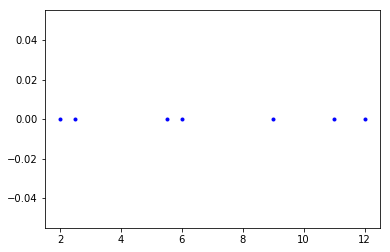

In [148]:
val = 0.
plt.plot(data9, np.zeros_like(data9) + val, 'b.')
plt.show()

In [140]:
np.zeros_like(data9)

array([[0., 0., 0., 0., 0., 0., 0.]])

In [116]:
df9[0]

1     2.0
2     2.5
3     5.5
4     6.0
5     9.0
6    11.0
7    12.0
Name: 0, dtype: float64

In [118]:
from sklearn.cluster import KMeans

cost = []
kmeans = KMeans(n_clusters=2, random_state=0).fit(M_data9)
cost.append(abs(kmeans.score(M_data9)))

In [119]:
cost

[17.166666666666686]

In [120]:
kmeans.labels_

array([1, 1, 1, 1, 0, 0, 0], dtype=int32)

In [121]:
kmeans.cluster_centers_

array([[10.66666667],
       [ 4.        ]])

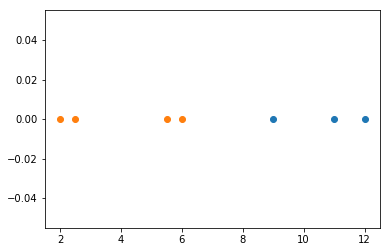

In [145]:
val = 0.
plt.plot(M_data9[kmeans.labels_ == 0], np.zeros_like(M_data9[kmeans.labels_ == 0]) + val, 'o')
plt.plot(M_data9[kmeans.labels_ == 1], np.zeros_like(M_data9[kmeans.labels_ == 1]) + val, 'o')
plt.show()

In [132]:
M_data9[kmeans.labels_ == 0,0]

matrix([[ 9.],
        [11.],
        [12.]])

In [134]:
M_data9[kmeans.labels_ == 1,0]

matrix([[2. ],
        [2.5],
        [5.5],
        [6. ]])

b) K-medoids
<br/>
- Kmeans의 한계 : 아웃라이어나 noise에 민감하다
- K-medoids = 클러스터의 대표값으로 오브젝트의 중심점을 구하는 것이다.
<br/>

- K-mean의 경우 평균을 대표값으로 가져가기 떄문에 분산을 기준으로 알고리즘이 진행되는데
- K-medoid는 중앙값을 대표값으로 가져가므로 위처럼 절대 오차를 기준으로 진행된다.

## 10. There are n observations with a single variable x_1,…,x_n (in other words, there are n points on a line). And, we are trying to generate two clusters among those observations by using k-means algorithm.

<img src = "https://trello-attachments.s3.amazonaws.com/5b29ec749cfb0d90ada47d03/5beed7aec5343770f1b1c281/4d2b177fd4a63e253769aafd87b9fde5/image.png">

### In the case of k-means, convergence is guaranteed, then $\mu_k$ should be the mean of x values. <br>
### So, obeservations will be seperated over mean(X). 

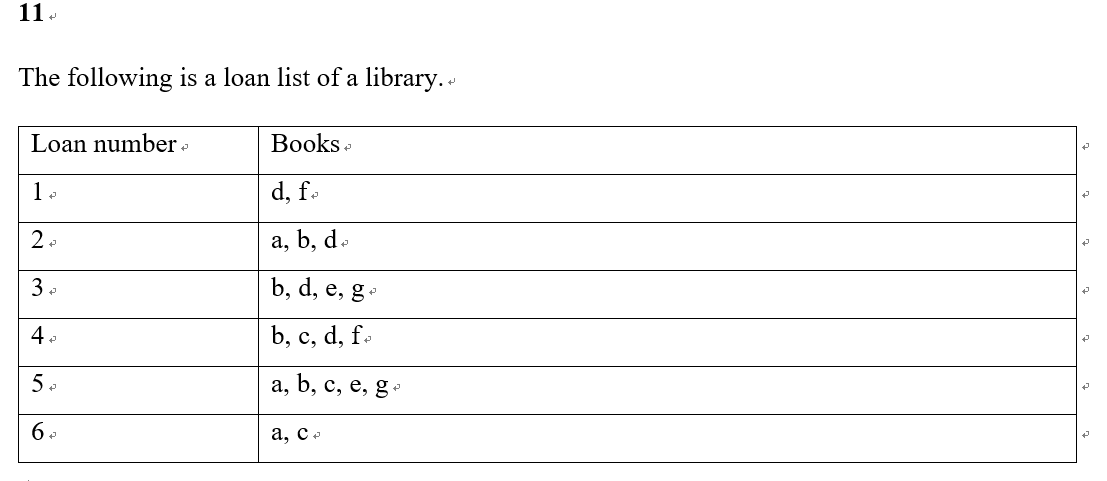

### Construc Sparse Matrix

In [170]:
loan_list = pd.DataFrame(columns=['a','b','c','d','e','f','g'],index=list(np.arange(6)+1))
loan_list.iloc[0] = [0,0,0,1,0,1,0]
loan_list.iloc[1] = [1,1,0,1,0,0,0]
loan_list.iloc[2] = [0,1,0,1,1,0,1]
loan_list.iloc[3] = [0,1,1,1,0,1,0]
loan_list.iloc[4] = [1,1,1,0,1,0,1]
loan_list.iloc[5] = [1,0,1,0,0,0,0]
loan_list

,a,b,c,d,e,f,g
1,0,0,0,1,0,1,0
2,1,1,0,1,0,0,0
3,0,1,0,1,1,0,1
4,0,1,1,1,0,1,0
5,1,1,1,0,1,0,1
6,1,0,1,0,0,0,0


### Calculating Support for each Item

In [171]:
c1 = loan_list.T.sum(axis=1) / len(loan_list)
c1

a    0.500000
b    0.666667
c    0.500000
d    0.666667
e    0.333333
f    0.333333
g    0.333333
dtype: float64

### Drop the Items whose support is less than minimum(0.5)

In [172]:
min_support = 0.5

In [175]:
l1 = c1.where(c1 >= min_support).dropna()
l1

a    0.500000
b    0.666667
c    0.500000
d    0.666667
dtype: float64

Book e,f are elminated here

In [177]:
d = np.matrix(loan_list[l1.index])
d

matrix([[0, 0, 0, 1],
        [1, 1, 0, 1],
        [0, 1, 0, 1],
        [0, 1, 1, 1],
        [1, 1, 1, 0],
        [1, 0, 1, 0]], dtype=int64)

In [178]:
df = pd.DataFrame(d.T * d/len(loan_list), index=l1.index, columns=l1.index)
df

,a,b,c,d
a,0.500000,0.333333,0.333333,0.166667
b,0.333333,0.666667,0.333333,0.500000
c,0.333333,0.333333,0.500000,0.166667
d,0.166667,0.500000,0.166667,0.666667


### (a) Only [b,d] are survived here. So frequent item sets are [b,d]

### (b) No rule exists here. 

### For 'a' to 'g' each item's support are less than 80% it means we have to cut off(pruning) all possible superset.

<img src = "https://trello-attachments.s3.amazonaws.com/5b29ec749cfb0d90ada47d03/5beed7aec5343770f1b1c281/a447b50106d7d6a4a12f004ed6afd683/image.png">

In [216]:
data = {
        'word1':[0.224,0.0194,0.0081,0.0087,0.0093,0.0183],
        'word2':[0.075,0.0043,0.0092,0.0174,0.0061,0.0249],
        'word3':[0.119,0.0054,0.0127,0.0091,0.0172,0.0084],
        'word4':[0.282,0.0151,0.0104,0.0185,0.0028,0.0267]
}
index = ['target user','document1','document2','document3','document4','document5']
df12 = pd.DataFrame(data,index=index)
df12

,word1,word2,word3,word4
target user,0.2240,0.0750,0.1190,0.2820
document1,0.0194,0.0043,0.0054,0.0151
document2,0.0081,0.0092,0.0127,0.0104
document3,0.0087,0.0174,0.0091,0.0185
document4,0.0093,0.0061,0.0172,0.0028
document5,0.0183,0.0249,0.0084,0.0267


In [209]:
from sklearn.metrics.pairwise import cosine_similarity

In [230]:
sol12 = cosine_similarity(df12[:1],df12[1:])
sol12

array([[0.96923993, 0.87724584, 0.87171736, 0.67272994, 0.89922903]])

Then, in order of priority is 1,5,2,3,4

## Problem 13.

In [234]:

data = {
    'customer1':[0,0,1,1,0,1],
    'customer2':[1,1,1,0,0,1],
    'customer3':[1,0,0,1,0,0],
    'customer4':[1,1,0,1,1,1],
    'customer5':[0,1,0,1,1,0],
    'Targetcustomer':[1,0,0,0,0,1]
}

index = ['product1','product2','product3','product4','product5','product6']
df13 = pd.DataFrame(data,index=index)
df13 = df13.T
df13

,product1,product2,product3,product4,product5,product6
Targetcustomer,1,0,0,0,0,1
customer1,0,0,1,1,0,1
customer2,1,1,1,0,0,1
customer3,1,0,0,1,0,0
customer4,1,1,0,1,1,1
customer5,0,1,0,1,1,0


In [455]:
MT = df13.ix['Targetcustomer'].mean()
M1 = df13.ix['customer1'].mean()
M2 = df13.ix['customer2'].mean()
M3 = df13.ix['customer3'].mean()
M4 = df13.ix['customer4'].mean()
M5 = df13.ix['customer5'].mean()

In [500]:
p_a = 1/6

In [498]:
p_i = [3/6,4/6,2/6,5/6,3/6]
A = np.matrix(p_i)
A

matrix([[0.5       , 0.66666667, 0.33333333, 0.83333333, 0.5       ]])

In [499]:
p_ai =[1/6,2/6,1/6,2/6,0]
B = np.matrix(p_ai)
B

matrix([[0.16666667, 0.33333333, 0.16666667, 0.33333333, 0.        ]])

In [509]:
import math

In [516]:
w_a =[]
for i in range(5):
    w= (p_ai[i]-p_a*p_i[i])/(math.sqrt(p_a*(1-p_a))*math.sqrt(p_i[i]*(1-p_i[i])))
    w_a.append(abs(w))
    print(w)

0.4472135954999579
1.2649110640673515
0.6324555320336758
1.4000000000000001
-0.4472135954999579


In [517]:
w_a

[0.4472135954999579,
 1.2649110640673515,
 0.6324555320336758,
 1.4000000000000001,
 0.4472135954999579]

In [520]:
k_a = sum(w_a)
k_a

4.191793787100944

In [546]:
df13['product1']

Targetcustomer    1
customer1         0
customer2         1
customer3         1
customer4         1
customer5         0
Name: product1, dtype: int64

In [548]:
a =[]
final =[]
for j in range(5):
    a.append(w_a[j]*df13['product1'][j])
    b=sum(a)

b*k_a

12.268888813985303

In [549]:
a =[]
final =[]
for j in range(5):
    a.append(w_a[j]*df13['product2'][j])
    b=sum(a)

b*k_a

4.525750340920182

In [550]:
a =[]
final =[]
for j in range(5):
    a.append(w_a[j]*df13['product3'][j])
    b=sum(a)

b*k_a

7.9533695093891525

In [551]:
a =[]
final =[]
for j in range(5):
    a.append(w_a[j]*df13['product4'][j])
    b=sum(a)

b*k_a

13.045384812657888

In [552]:
a =[]
final =[]
for j in range(5):
    a.append(w_a[j]*df13['product5'][j])
    b=sum(a)

b*k_a

1.8746271711237983